We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 

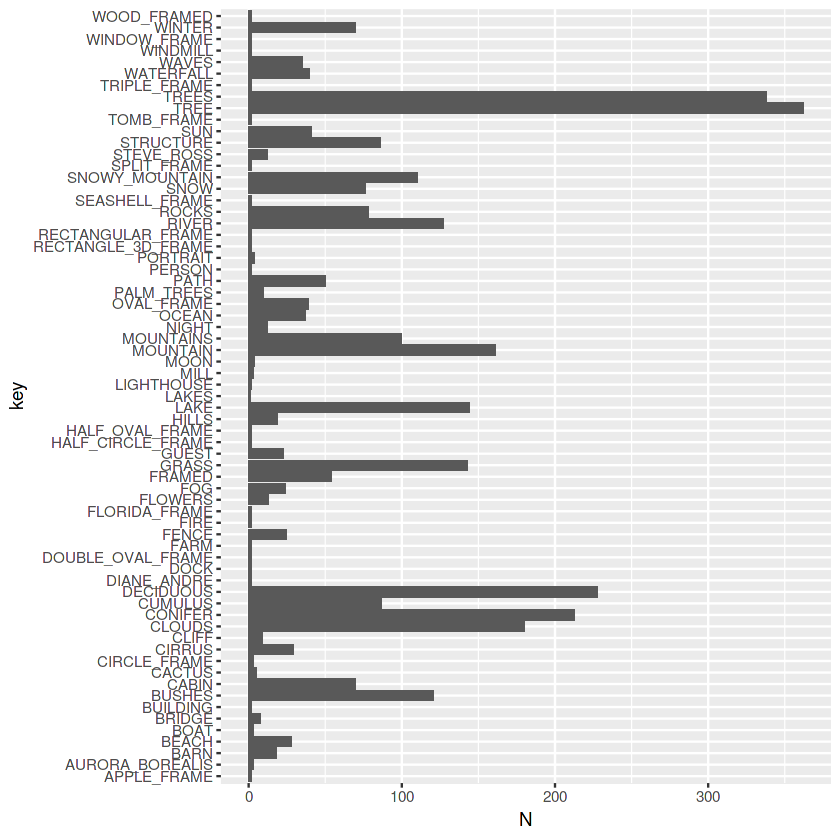

In [124]:
library('tidyverse')
library('dplyr')

df = read.csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

df = select(df,-c("EPISODE","TITLE"))


df = df %>%
    pivot_longer(names_to = 'key', values_to = 'count', cols = everything()) %>% 
       group_by(key) %>% 
    summarize(N = sum(count, na.rm = T, sort=TRUE)) 

df.sorted = df %>% mutate(key = fct_lump(key, n = 10))

p = ggplot(df.sorted, aes(x = key, y = N))

p = p + geom_bar(stat="identity") + coord_flip() 

p